# Analyzing topics, page counts, and word frequencies

In [3]:
from htrc_features import FeatureReader
import os
import numpy as np
import pandas as pd

get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### First set of volumes — word frequency in novels
The following cell loads a collection of nine novels from the 18th-20th centuries, chosen from an HTRC collection. These books will be used as a departure point for our text analysis. The procedure follows directly from the HTRC README file in the working directory.

In [4]:
%%bash
htid2rsync --f novels-word-use.txt | rsync -azv --files-from=- data.sharc.hathitrust.org::features/ local-folder/

[sandbox] Welcome to the HathiTrust Research Center rsync server.

receiving file list ... done

sent 748 bytes  received 1,705 bytes  981.20 bytes/sec
total size is 1,768,677  speedup is 721.03


In [5]:
paths = [os.path.join('local-folder', 'hvd/pairtree_root/32/04/40/11/76/45/45/32044011764545/hvd.32044011764545.json.bz2'), 
         os.path.join('local-folder', 'mdp/pairtree_root/39/01/50/02/96/98/74/39015002969874/mdp.39015002969874.json.bz2'), 
         os.path.join('local-folder', 'mdp/pairtree_root/39/01/50/07/03/27/10/39015007032710/mdp.39015007032710.json.bz2'), 
         os.path.join('local-folder', 'mdp/pairtree_root/39/01/50/42/15/25/23/39015042152523/mdp.39015042152523.json.bz2'), 
         os.path.join('local-folder', 'mdp/pairtree_root/39/01/50/46/34/91/41/39015046349141/mdp.39015046349141.json.bz2'),
         os.path.join('local-folder', 'mdp/pairtree_root/39/01/50/78/55/08/63/39015078550863/mdp.39015078550863.json.bz2'),
         os.path.join('local-folder', 'mdp/pairtree_root/39/01/50/78/56/59/11/39015078565911/mdp.39015078565911.json.bz2'),
         os.path.join('local-folder', 'pst/pairtree_root/00/00/67/11/28/69/000067112869/pst.000067112869.json.bz2'), 
         os.path.join('local-folder', 'wu/pairtree_root/89/00/12/77/76/3/89001277763/wu.89001277763.json.bz2')]

fr_novels = FeatureReader(paths)

### Note: selecting volumes
The following cell is useful in choosing a volume to manipulate. Set TITLE_WORD to any word that is contained in the title of the fr-volume you would like to work with (the string comparison is case-insensitive since some titles are lower-case). The volume will then be stored as 'vol', and can be reassigned to any variable name you would like.

In [6]:
TITLE_WORD = ''

for vol in fr_novels:
    print(vol.title)

for vol in fr_novels:
    if TITLE_WORD.lower() in vol.title.lower():
        break

Wuthering heights.
Nine stories.
Uncle Tom's cabin,
The grapes of wrath / John Steinbeck ; with an introduction by Brad Leithauser.
The sound and the fury / [by] William Faulkner ; with an introduction by Richard Hughes.
The life and adventures of Robinson Crusoe.
Gulliver's travels. By Jonathan Swift ...
To kill a mockingbird / by Harper Lee ; editor, Don Noble.
Great expectations / by Charles Dickens.


## Sampling tokens from a book
The following cell will take a random sample of 50 tokens which appear at least 50 times in the chosen book. It will then calculate their relative frequencies (found by dividing the number of appearances over the total number of words in the book) and display the results in a DataFrame.

In [7]:
tokens_1 = vol.tokenlist(pos=False, case=False, pages=False) 

tokens_2 = tokens_1[tokens_1['count'] > 50].sample(50)
tokens_2.sort_values('count', ascending=False, inplace=True)
tokens_2

freqs = []
for count in tokens_2['count']:
    freqs.append(count/sum(tokens_1['count']))
    
tokens_2['frequency'] = freqs
tokens_2

/Users/Nate/anaconda/lib/python3.6/site-packages/htrc_features/feature_reader.py:603: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  df.sortlevel(inplace=True)


count  frequency
section lowercase                   
body    a            3949   0.014942
        his          1968   0.007447
        me           1867   0.007064
        '            1225   0.004635
        so            892   0.003375
        by            834   0.003156
        do            702   0.002656
        what          590   0.002232
        this          562   0.002127
        more          451   0.001707
        heathcliff    446   0.001688
        which         419   0.001585
        shall         349   0.001321
        again         268   0.001014
        still         257   0.000972
        think         250   0.000946
        may           241   0.000912
        back          188   0.000711
        first         168   0.000636
        old           163   0.000617
        even          153   0.000579
        hope          129   0.000488
        keep          125   0.000473
        (             110   0.000416
        t             109   0.000412
        >             108   0.000409
        speak         103   0.000390
        began         102   0.000386
        want           89   0.000337
        'er            84   0.000318
        seen           83   0.000314
        grange         81   0.000306
        gave           78   0.000295
        voice          77   0.000291
        open           77   0.000291
        hindley        75   0.000284
        return         74   0.000280
        sweet          72   0.000272
        believe        70   0.000265
        neither        64   0.000242
        friends        63   0.000238
        really         61   0.000231
        name           60   0.000227
        green          59   0.000223
        help           57   0.000216
        matilda        56   0.000212
        length         55   0.000208
        worse          55   0.000208
        person         54   0.000204
        spoke          51   0.000193

### Graphing word frequencies
The following cell outputs a scatter plot of counts and frequencies from the sample. The relationship between count and frequency is, obviously, linear, and most of the points are clustered in the lower-left corner. Also shown (as a dashed line) is the mean frequency for all tokens in the sample.

Average word frequency from sample: 0.0014


(45, 3969)

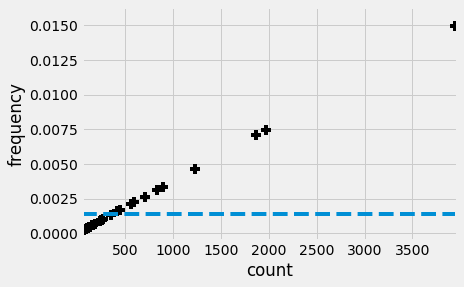

In [8]:
# Output mean frequency.
print('Average word frequency from sample:', float('%.4f' % np.mean(freqs)))

# Plot points from tokens_2.
tokens_2.plot.scatter('count', 'frequency', s=100, marker='+', color='black')

# Plot mean and scale axes.
plt.plot((45, max(tokens_2['count'])), (np.mean(freqs), np.mean(freqs)), '--')
plt.ylim(-.0005, np.max(freqs)+np.mean(freqs))
plt.xlim(45, max(tokens_2['count'])+20)

## Sampling tokens from all books
Now we can see how relative word frequencies compare across all the books in our sample. To do this, we'll need a few useful functions.
The first finds the most common noun in a volume, with adjustable parameters for minimum length.
The second calculates the relative frequency of a token across the entirety of a volume, saving us the time of doing the calculation like in the above cell.
Finally, we'll have a visualization function to create a bar plot of relative frequencies for all volumes in our sample, so that we can easily track how word frequencies differ across titles.

In [58]:
# A function to return the most common noun of length at least word_length in the volume.
# NOTE: word_length defaults to 2.
# e.g. most_common_noun(fr_novels.first) returns 'time'.

def most_common_noun(vol, word_length=2):   
    # Build a table of common nouns
    tokens_1 = vol.tokenlist(pages=False, case=False)
    nouns_only = tokens_1.loc[(slice(None), slice(None), ['NN']),]
    top_nouns = nouns_only.sort_values('count', ascending=False)

    token_index = top_nouns.index.get_level_values("lowercase")
    
    # Choose the first token at least as long as word_length with non-alphabetical characters
    for i in range(max(token_index.shape)):
        if (len(token_index[i]) >= word_length):
            if("'", "!", ",", "?" not in token_index[i]):
                return token_index[i]
    print('There is no noun of this length')
    return None

In [50]:
# Return the usage frequency of a given word in a given volume. 
# NOTE: frequency() returns a dictionary entry of the form {'word': frequency}.
# e.g. frequency(fr_novels.first(), 'blue') returns {'blue': 0.00012}

def frequency(vol, word):
    t1 = vol.tokenlist(pages=False, pos=False, case=False)
    token_index = t1[t1.index.get_level_values("lowercase") == word]
    
    if len(token_index['count'])==0:
        return {word: 0}
    
    count = token_index['count'][0]
    freq = count/sum(t1['count'])
    
    return {word: float('%.5f' % freq)}

In [84]:
# Returns a plot of the usage frequencies of the given word across all volumes in the given FeatureReader collection.
# NOTE: frequencies are given as percentages rather than true ratios.
def frequency_bar_plot(word, fr):
    freqs, titles = [], []
    for vol in fr:
        title = vol.title
        short_title = title[:6] + (title[6:] and '..')
        freqs.append(100*frequency(vol, word)[word])
        titles.append(short_title)
        
    # Format and plot the data
    x_ticks = np.arange(len(titles))
    plt.bar(x_ticks, freqs)
    plt.xticks(x_ticks, titles, fontsize=10)
    plt.ylabel('Frequency (%)', fontsize=12)
    plt.title('Frequency of "' + word + '"', fontsize=14)

### Testing frequency functions
The following cells call our frequency functions on a few examples from the novels FeatureReader.

In [85]:
# Most common noun in fr_novels.first
vol = fr_novels.first()
most_common_noun(vol)

/Users/Nate/anaconda/lib/python3.6/site-packages/htrc_features/feature_reader.py:603: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  df.sortlevel(inplace=True)


'time'

In [86]:
# Most common noun of length at least 10 in fr_novels.first
most_common_noun(vol, 10)

'countenance'

In [87]:
# Frequency of 'countenance' in fr_novels.first
frequency(vol, 'countenance')

{'countenance': 0.00017}

/Users/Nate/anaconda/lib/python3.6/site-packages/htrc_features/feature_reader.py:603: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  df.sortlevel(inplace=True)


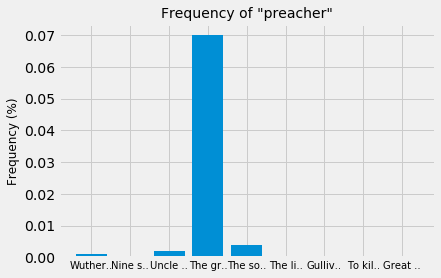

In [88]:
# Frequency bar plot for most common >=7-letter noun in The Grapes of Wrath
for vol in fr_novels:
    if 'grapes' in vol.title:
        break
        
frequency_bar_plot(most_common_noun(vol, 7), fr_novels)

## More frequency analysis — non-fiction volumes
Now we'll load a collection of 33 math textbooks from the 18th and 19th centuries. These volumes focus on number theory and arithmetic, and were written during the lives of Leonhard Euler and Joseph-Louis Lagrange – two of the most prolific researchers of number theory in all of history. As a result, we can expect the frequency of certain words and topics to shift over time to reflect the state of contemporary research. Let's load them and see.

In [89]:
%%bash
htid2rsync --f math-collection.txt | rsync -azv --files-from=- data.sharc.hathitrust.org::features/ local-folder/

[sandbox] Welcome to the HathiTrust Research Center rsync server.

receiving file list ... done

sent 2,620 bytes  received 5,056 bytes  5,117.33 bytes/sec
total size is 6,390,002  speedup is 832.47


In [90]:
math_paths = [
    'hvd/pairtree_root/32/04/40/14/61/26/26/32044014612626/hvd.32044014612626.json.bz2',
    'hvd/pairtree_root/hn/5f/26/hn5f26/hvd.hn5f26.json.bz2',
    'hvd/pairtree_root/hn/5z/9x/hn5z9x/hvd.hn5z9x.json.bz2',
    'mdp/pairtree_root/39/01/50/07/02/69/93/39015007026993/mdp.39015007026993.json.bz2',
    'mdp/pairtree_root/39/01/50/10/96/31/58/39015010963158/mdp.39015010963158.json.bz2',
    'mdp/pairtree_root/39/01/50/18/03/70/05/39015018037005/mdp.39015018037005.json.bz2',
    'mdp/pairtree_root/39/01/50/36/84/95/63/39015036849563/mdp.39015036849563.json.bz2',
    'mdp/pairtree_root/39/01/50/36/84/95/71/39015036849571/mdp.39015036849571.json.bz2',
    'mdp/pairtree_root/39/01/50/36/84/95/89/39015036849589/mdp.39015036849589.json.bz2',
    'mdp/pairtree_root/39/01/50/41/15/83/23/39015041158323/mdp.39015041158323.json.bz2',
    'mdp/pairtree_root/39/01/50/63/55/49/79/39015063554979/mdp.39015063554979.json.bz2',
    'mdp/pairtree_root/39/01/50/63/55/51/33/39015063555133/mdp.39015063555133.json.bz2',
    'mdp/pairtree_root/39/01/50/63/61/99/47/39015063619947/mdp.39015063619947.json.bz2',
    'mdp/pairtree_root/39/01/50/63/62/00/93/39015063620093/mdp.39015063620093.json.bz2',
    'mdp/pairtree_root/39/01/50/63/62/01/19/39015063620119/mdp.39015063620119.json.bz2',
    'mdp/pairtree_root/39/01/50/63/63/11/57/39015063631157/mdp.39015063631157.json.bz2',
    'mdp/pairtree_root/39/01/50/63/63/87/15/39015063638715/mdp.39015063638715.json.bz2',
    'mdp/pairtree_root/39/01/50/63/87/18/52/39015063871852/mdp.39015063871852.json.bz2',
    'mdp/pairtree_root/39/01/50/63/87/20/17/39015063872017/mdp.39015063872017.json.bz2',
    'mdp/pairtree_root/39/01/50/63/89/52/73/39015063895273/mdp.39015063895273.json.bz2',
    'mdp/pairtree_root/39/01/50/63/89/54/63/39015063895463/mdp.39015063895463.json.bz2',
    'mdp/pairtree_root/39/01/50/63/89/57/45/39015063895745/mdp.39015063895745.json.bz2',
    'mdp/pairtree_root/39/01/50/64/32/01/49/39015064320149/mdp.39015064320149.json.bz2',
    'mdp/pairtree_root/39/01/50/64/33/35/48/39015064333548/mdp.39015064333548.json.bz2',
    'mdp/pairtree_root/39/01/50/65/32/09/40/39015065320940/mdp.39015065320940.json.bz2',
    'mdp/pairtree_root/39/01/50/65/32/09/57/39015065320957/mdp.39015065320957.json.bz2',
    'mdp/pairtree_root/39/01/50/67/06/47/28/39015067064728/mdp.39015067064728.json.bz2',
    'mdp/pairtree_root/39/01/50/67/25/22/16/39015067252216/mdp.39015067252216.json.bz2',
    'mdp/pairtree_root/39/01/50/82/30/80/68/39015082308068/mdp.39015082308068.json.bz2',
    'nyp/pairtree_root/33/43/30/69/09/23/63/33433069092363/nyp.33433069092363.json.bz2',
    'uc1/pairtree_root/$b/26/27/22/$b262722/uc1.$b262722.json.bz2',
    'uc1/pairtree_root/$b/41/71/72/$b417172/uc1.$b417172.json.bz2',
    'uc1/pairtree_root/$b/53/23/17/$b532317/uc1.$b532317.json.bz2'
    ]
    
fr_math = FeatureReader()

for path in math_paths:
    fr_math.paths.append(os.path.join('local-folder', path))

### Another frequency function
The next cell contains a frequency_by_year function that takes as inputs a query word and a FeatureReader object. The function calculates relative frequencies of the query word across all volumes in the FR, then outputs them in a DataFrame sorted by the volume year. It then plots the frequencies and allows us to easily see trends in word usage across a time period.

In [101]:
# Returns a DF of relative frequencies, volume years, and page counts, along with a scatter plot.
# NOTE: frequencies are given in percentages rather than true ratios.
def frequency_by_year(query_word, fr):
    volumes = pd.DataFrame()
    years, page_counts, query_freqs = [], [], []

    for vol in fr:
        years.append(int(vol.year))
        page_counts.append(int(vol.page_count))
        query_freqs.append(100*frequency(vol, query_word)[query_word])
    
    volumes['year'], volumes['pages'], volumes['freq'] = years, page_counts, query_freqs
    volumes = volumes.sort_values('year')
    
    # Set plot dimensions and labels
    scatter_plot = volumes.plot.scatter('year', 'freq', color='black', s=50, fontsize=12)
    plt.ylim(0-np.mean(query_freqs), max(query_freqs)+np.mean(query_freqs))
    plt.ylabel('Frequency (%)', fontsize=12)
    plt.xlabel('Year', fontsize=12)
    plt.title('Frequency of "' + query_word + '"', fontsize=14)
    
    return volumes.head(10)

### Checking for shifts over time
In 1744, Euler began a huge volume of work on identifying quadratic forms and progressions of primes. It follows from reason, then, that the mentions of these topics in number theory textbooks should see a discernible jump following the 1740's. The following cells call frequency_by_year on several relevant words.

/Users/Nate/anaconda/lib/python3.6/site-packages/htrc_features/feature_reader.py:603: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  df.sortlevel(inplace=True)


,year,pages,freq
28,1701,690,0.000
16,1705,284,0.022
22,1716,496,0.000
4,1720,310,0.000
3,1721,512,0.012
15,1729,460,0.000
5,1730,688,0.000
27,1731,510,0.021
19,1735,430,0.000
2,1736,194,0.000


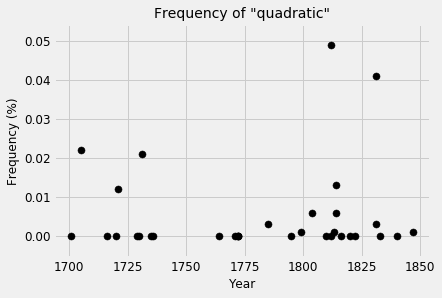

In [98]:
frequency_by_year('quadratic', fr_math)

/Users/Nate/anaconda/lib/python3.6/site-packages/htrc_features/feature_reader.py:603: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  df.sortlevel(inplace=True)


,year,pages,freq
28,1701,690,0.013
16,1705,284,0.006
22,1716,496,0.009
4,1720,310,0.005
3,1721,512,0.002
15,1729,460,0.001
5,1730,688,0.058
27,1731,510,0.002
19,1735,430,0.001
2,1736,194,0.006


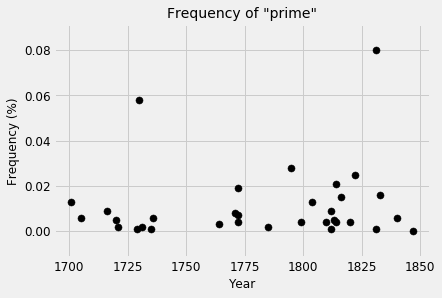

In [99]:
frequency_by_year('prime', fr_math)

/Users/Nate/anaconda/lib/python3.6/site-packages/htrc_features/feature_reader.py:603: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  df.sortlevel(inplace=True)


,year,pages,freq
28,1701,690,0.014
16,1705,284,0.000
22,1716,496,0.013
4,1720,310,0.001
3,1721,512,0.013
15,1729,460,0.005
5,1730,688,0.015
27,1731,510,0.015
19,1735,430,0.000
2,1736,194,0.003


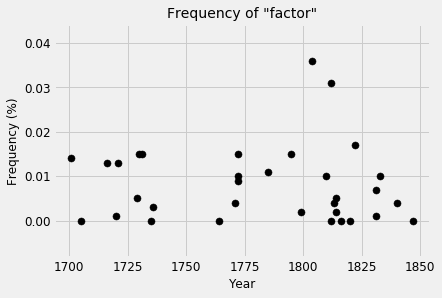

In [100]:
frequency_by_year('factor', fr_math)